<a href="https://colab.research.google.com/github/zahrababacar6c/Superstore-Sales-Analysis/blob/main/Analyse_Campagne_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import des libraieies necssaires**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns


## **Chargement des donnees**

In [ ]:
customer_demografic_df  =pd.read_csv("/content/dataset/customer_demographic_data.csv")
customer_demografic_df.head()

,Customer ID,Age,Gender,Location,Income Level
0,1,65,Male,Martinezmouth,61083
1,2,43,Non-binary,South Anne,90419
2,3,58,Non-binary,West Darrellport,38260
3,4,53,Non-binary,Stevenshire,34649
4,5,69,Female,South Kellychester,70420


In [ ]:
customer_interaction_df = pd.read_csv("/content/dataset/customer_interactions.csv")
customer_interaction_df.head()

,Customer ID,Interaction Date,Interaction Type,Interaction Channel
0,1,2/28/2024,share,website
1,2,4/27/2024,view,social media
2,3,2/26/2024,share,email
3,4,2/13/2024,click,email
4,5,4/1/2024,share,social media


In [ ]:
sales_df  = pd.read_csv('/content/dataset/sales_data.csv')

In [ ]:
sales_df.head()

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity
0,1,1/19/2024,213,345,Books,295.15,7
1,2,6/11/2024,59,134,Electronics,457.78,1
2,3,1/10/2024,178,89,Electronics,423.84,2
3,4,5/30/2024,359,423,Home & Kitchen,497.52,1
4,5,3/21/2024,384,139,Clothing,164.21,7


## **Nettoyage des donnees**

**customer_demografic_df**

In [ ]:
customer_demografic_df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Location,object
Income Level,int64


In [ ]:
customer_demografic_df.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
Location,0
Income Level,0


**customer_interaction_df**

In [ ]:
customer_interaction_df.dtypes

,0
Customer ID,int64
Interaction Date,object
Interaction Type,object
Interaction Channel,object


In [ ]:
# Convertir Interaction date en Datetime
customer_interaction_df["Interaction Date"]=pd.to_datetime(customer_interaction_df["Interaction Date"])

In [ ]:
customer_interaction_df.dtypes

,0
Customer ID,int64
Interaction Date,datetime64[ns]
Interaction Type,object
Interaction Channel,object


In [ ]:
customer_interaction_df.isna().sum()

,0
Customer ID,0
Interaction Date,0
Interaction Type,0
Interaction Channel,11


In [ ]:
# Remplacer les valeurs nuls par le plus repreentatif valeur
print(customer_interaction_df["Interaction Channel"].value_counts())
customer_interaction_df['Interaction Channel'].fillna('website',inplace=True)


Interaction Channel
website         334
email           329
social media    326
Name: count, dtype: int64


In [ ]:
customer_interaction_df.isna().sum()

,0
Customer ID,0
Interaction Date,0
Interaction Type,0
Interaction Channel,0


**Sales_df**

In [ ]:
sales_df.dtypes

,0
Transaction ID,int64
Transaction Date,object
Customer ID,int64
Product ID,int64
Product Category,object
Sales Amount,float64
Quantity,int64


In [ ]:
#Convertir  Transaction date en datetimes
sales_df['Transaction Date'] = pd.to_datetime(sales_df['Transaction Date'])

In [ ]:
sales_df.dtypes

,0
Transaction ID,int64
Transaction Date,datetime64[ns]
Customer ID,int64
Product ID,int64
Product Category,object
Sales Amount,float64
Quantity,int64


In [ ]:
sales_df.isna().sum()

,0
Transaction ID,0
Transaction Date,0
Customer ID,0
Product ID,0
Product Category,0
Sales Amount,0
Quantity,0


## **Analyse exploratoire de nos donnees**

**Le Nombre de clients qui ont interagi avec les supports de campagne,quels sont leurs engagements**

**Total des clients qui ont interagi au campagne par type d'interation et category de supports**

**I..Total des clients qui ont interagi au campagne par type d'interation**

In [ ]:
# Nombre total de clients qui ont Interagi
customer_interaction_df['Customer ID'].unique().size

1000

In [ ]:
# Nombre total de clients qui ont Interagi par category d'Interaction'
Total_cust_inter_by_type= (customer_interaction_df['Interaction Type'].value_counts()/1000)*100
Total_cust_inter_by_type

,count
Interaction Type,
share,35.6
click,32.6
view,31.8


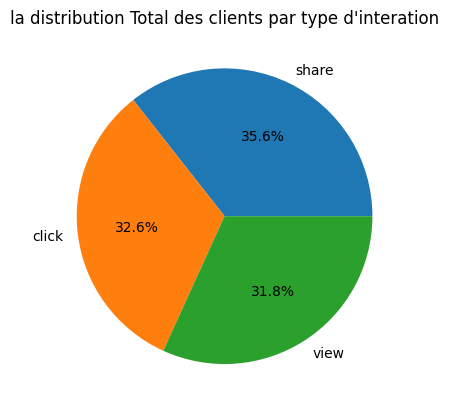

In [ ]:
#visualisation  Nombre total de clients qui ont Interagi par category d'Interaction'
plt.pie(Total_cust_inter_by_type,labels =Total_cust_inter_by_type.index,autopct='%1.1f%%')
plt.title("la distribution Total des clients par type d'interation")
plt.show()

**II..Total des clients qui ont interagi au campagne par category de supports**

In [ ]:
# Nombre total de clients qui ont Interagi par category d'Interaction'
Total_cust_inter_by_channel= customer_interaction_df['Interaction Channel'].value_counts()
Total_cust_inter_by_channel

,count
Interaction Channel,
website,34.5
email,32.9
social media,32.6


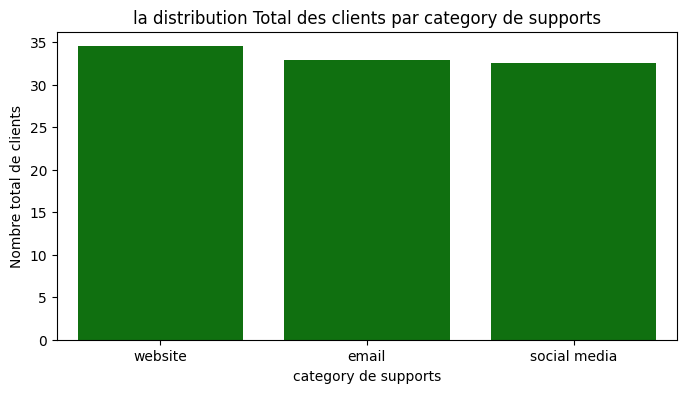

In [ ]:
#visualisation  Nombre total de clients qui ont Interagi par category d'Interaction'
plt.figure(figsize =(8,4))
sns.barplot(x=Total_cust_inter_by_channel.index,y = Total_cust_inter_by_channel.values,color='g')
plt.title("la distribution Total des clients par category de supports")
plt.xlabel("category de supports")
plt.ylabel("Nombre total de clients")
plt.show()

**Déterminer le taux d'engagement Des clients**




In [ ]:
engagment_rate =  (1000/1500)*100
print("le taux d'engagement des clients lors du campagne est de ",round(engagment_rate,2),'%')

le taux d'engagement des clients lors du campagne est de  66.67 %


**Pourcentage d'engagement des clients ayant effectué un achat et comment cela se compare-t-il à nos objectifs ?**

In [ ]:
cust_inter_purch_df = pd.merge(customer_interaction_df,sales_df,on ='Customer ID',how='inner')
cust_inter_purch_df.head()

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity
0,1,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6
1,2,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9
2,2,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6
3,2,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9
4,2,2024-04-27,view,social media,1183,2024-02-06,241,Books,13.68,7


In [ ]:
total_cust_inter_purch = cust_inter_purch_df['Customer ID'].nunique()
total_cust_inter_purch

656

In [ ]:
#Taux des Achats cibles
purch_rate_target = (total_cust_inter_purch/1500)*100
print("le taux des achats cible: ",round(purch_rate_target,2),'%')
#Taux d'engagement des achats
purch_rate_engaged =  (total_cust_inter_purch/1000)*100
print("le taux d'engagement d'achats des clients lors du campagne : ",round(purch_rate_engaged,2),'%')

le taux des achats cible:  43.73 %
le taux d'engagement d'achats des clients lors du campagne :  65.6 %


## **L'impact global sur les ventes ? Avons-nous constaté une augmentation significative des ventes pendant et après la période de campagne ?**

**Total des ventes realises durant la campagne**

In [60]:
sales_df['Transaction Date'].min()

Timestamp('2024-01-01 00:00:00')

**Total des ventes realises duraapresnt la campagne**

In [62]:
sales_df['Transaction Date'].max()

Timestamp('2024-07-06 00:00:00')

In [63]:
sales_df['Sales'] = sales_df['Quantity']*sales_df['Sales Amount']

In [65]:
sales_df.head(3)

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales
0,1,2024-01-19,213,345,Books,295.15,7,2066.05
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68


In [68]:
sales_df['Mounth'] = sales_df["Transaction Date"].dt.month
sales_df['Day'] = sales_df["Transaction Date"].dt.day
sales_df.head(3)

,Transaction ID,Transaction Date,Customer ID,Product ID,Product Category,Sales Amount,Quantity,Sales,Mounth,Day
0,1,2024-01-19,213,345,Books,295.15,7,2066.05,1,19
1,2,2024-06-11,59,134,Electronics,457.78,1,457.78,6,11
2,3,2024-01-10,178,89,Electronics,423.84,2,847.68,1,10


In [70]:
sales_campagn = sales_df[sales_df['Mounth']<5]['Sales']
sales_campagn

,Sales
0,2066.05
2,847.68
4,1149.47
5,2875.20
6,977.55
...,...
1362,378.48
1364,440.93
1365,2882.76
1366,286.68


In [74]:
sales_after_campagn = sales_df[sales_df['Mounth']>4]['Sales']
sales_after_campagn

,Sales
1,457.78
3,497.52
9,1014.58
10,659.16
15,4341.80
...,...
1360,1022.36
1361,3395.34
1363,2393.30
1367,481.28


In [80]:
total_sales_campagn = sales_campagn.sum()
print('Le total des vente realiser lors de la campagne:',total_sales_campagn)

Le total des vente realiser lors de la camoagne: 1308551.48


In [81]:
total_sales_after_campagn = sales_after_campagn.sum()
print('Le total des vente realiser apres de la campagne:',total_sales_after_campagn)

Le total des vente realiser apres de la campagne: 637323.8199999998


**Verification Dimuniton ou Augmentation du taux des Ventes**

In [85]:
sales_incr_rate = ((total_sales_campagn - total_sales_after_campagn)/total_sales_after_campagn)*100
print("le taux d'augmentation des ventes est de : ",round(sales_incr_rate,2),'%')

le taux d'augmentation des ventes est de :  105.32 %


## **Comment le retour sur investissement(ROI) de cette campagne se compare-t-il à celui des précédentes ? Nos dépenses ont-elles été justifiées par les résultats ?**

### **ROI de cette Campagne**

In [86]:
roi_recent_camp = ((total_sales_campagn - 50000)/50000)*100
print("le ROI de cette Campagne est de : ",round(roi_recent_camp,2),)

le ROI de cette Campagne est de :  2517.1


### **ROI des Campagne Precedent**

In [88]:
roi_previous_camp = ((268009 - 57000)/57000)*100
print("le ROI des Campagne precedent est de : ",round(roi_previous_camp,2),)

le ROI des Campagne precedent est de :  370.19


In [89]:
roi_growth = ((roi_recent_camp - roi_previous_camp)/roi_previous_camp)*100
print("le taux de croissance du ROI est de : ",round(roi_growth,2),'%')

le taux de croissance du ROI est de :  579.95 %


## **Quelles catégories de clients ont réagi de manière plus positive ou plus négative à la campagne ? Y a-t-il des segments spécifiques sur lesquels nous devrions nous concentrer ou éviter à l'avenir ?**

### **Taux Engenement des clients par Groupe**

In [94]:
interacted_customer_df = pd.merge(customer_interaction_df,customer_demografic_df,on ='Customer ID',how='inner')
interacted_customer_df.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Age,Gender,Location,Income Level
0,1,2024-02-28,share,website,65,Male,Martinezmouth,61083
1,2,2024-04-27,view,social media,43,Non-binary,South Anne,90419
2,3,2024-02-26,share,email,58,Non-binary,West Darrellport,38260


In [118]:
young_intr =interacted_customer_df[(interacted_customer_df['Age']>17) & (interacted_customer_df['Age']<25)]
young_intr.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Age,Gender,Location,Income Level
8,9,2024-04-08,click,email,24,Non-binary,East Melanie,43329
12,13,2024-02-01,share,social media,23,Non-binary,Port Vincent,46646
20,21,2024-04-27,share,website,19,Non-binary,Paceview,53522


In [120]:
young_low_income_intr = young_intr[young_intr['Income Level']<30000]
young_low_income_intr.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Age,Gender,Location,Income Level
51,52,2024-05-04,view,social media,20,Other,Dianaton,19176
64,65,2024-01-18,click,social media,21,Male,Lukemouth,26780
92,93,2024-03-11,view,social media,20,Other,Port Marvin,23532


In [124]:
young_middle_income_intr = young_intr[(young_intr['Income Level']>30000)&(young_intr['Income Level']<75000)]
young_middle_income_intr.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Age,Gender,Location,Income Level
8,9,2024-04-08,click,email,24,Non-binary,East Melanie,43329
12,13,2024-02-01,share,social media,23,Non-binary,Port Vincent,46646
20,21,2024-04-27,share,website,19,Non-binary,Paceview,53522


In [108]:
middle_age_intr =interacted_customer_df[(interacted_customer_df['Age']>24)]
middle_age_intr.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Age,Gender,Location,Income Level
0,1,2024-02-28,share,website,65,Male,Martinezmouth,61083
1,2,2024-04-27,view,social media,43,Non-binary,South Anne,90419
2,3,2024-02-26,share,email,58,Non-binary,West Darrellport,38260


In [127]:
middle_high_income_intr = middle_age_intr[(middle_age_intr['Income Level']>75000)]
middle_high_income_intr.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Age,Gender,Location,Income Level
1,2,2024-04-27,view,social media,43,Non-binary,South Anne,90419
6,7,2024-03-03,click,website,43,Male,Lake Joseph,89845
9,10,2024-05-01,share,email,37,Non-binary,Port Andrew,81745


In [122]:
young_low_income_intr_cust=young_low_income_intr['Customer ID'].nunique()
egr_young_low_income_intr_cust = (young_low_income_intr_cust/1000)*100
round(egr_young_low_income_intr_cust,2)

2.9

In [125]:
young_middle_income_intr_cust=young_middle_income_intr['Customer ID'].nunique()
egr_young_middle_income_intr_cust = (young_middle_income_intr_cust/1000)*100
round(egr_young_middle_income_intr_cust,2)

7.7

In [128]:
middle_high_income_intr_cust=middle_high_income_intr['Customer ID'].nunique()
egr_middle_high_income_intr_cust = (middle_high_income_intr_cust/1000)*100
round(egr_middle_high_income_intr_cust,2)

22.8

### **Taux de conversion des clients par Groupe**

In [142]:
converted_cust_df = pd.merge(cust_inter_purch_df,customer_demografic_df,on ='Customer ID',how='inner')
converted_cust_df.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity,Age,Gender,Location,Income Level
0,1,2024-02-28,share,website,178,2024-05-31,88,Home & Kitchen,372.84,6,65,Male,Martinezmouth,61083
1,2,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9,43,Non-binary,South Anne,90419
2,2,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6,43,Non-binary,South Anne,90419


In [158]:
young_conver =converted_cust_df[(converted_cust_df['Age']>17) & (converted_cust_df['Age']<25)]
young_conver.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity,Age,Gender,Location,Income Level
11,9,2024-04-08,click,email,64,2024-02-02,372,Books,492.84,5,24,Non-binary,East Melanie,43329
12,9,2024-04-08,click,email,119,2024-02-26,162,Home & Kitchen,425.09,3,24,Non-binary,East Melanie,43329
13,9,2024-04-08,click,email,1205,2024-03-14,232,Toys,188.41,3,24,Non-binary,East Melanie,43329


In [159]:
young_low_income_conver = young_conver[young_conver['Income Level']<30000]
young_low_income_conver.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity,Age,Gender,Location,Income Level
85,52,2024-05-04,view,social media,849,2024-05-19,88,Books,488.03,4,20,Other,Dianaton,19176
86,52,2024-05-04,view,social media,1105,2024-04-27,195,Home & Kitchen,264.88,3,20,Other,Dianaton,19176
101,65,2024-01-18,click,social media,584,2024-02-25,31,Clothing,313.44,6,21,Male,Lukemouth,26780


In [150]:
young_middle_income_conver = young_conver[(young_conver['Income Level']>30000)&(young_conver['Income Level']<75000)]

In [160]:
middle_age_conver =converted_cust_df[(converted_cust_df['Age']>24)]
middle_high_income_conver = middle_age_conver[(middle_age_conver['Income Level']>75000)]
middle_high_income_conver.head(3)

,Customer ID,Interaction Date,Interaction Type,Interaction Channel,Transaction ID,Transaction Date,Product ID,Product Category,Sales Amount,Quantity,Age,Gender,Location,Income Level
1,2,2024-04-27,view,social media,135,2024-03-18,84,Clothing,485.74,9,43,Non-binary,South Anne,90419
2,2,2024-04-27,view,social media,223,2024-07-04,99,Sports,482.55,6,43,Non-binary,South Anne,90419
3,2,2024-04-27,view,social media,886,2024-03-13,170,Home & Kitchen,272.24,9,43,Non-binary,South Anne,90419


In [155]:
young_low_income_conver_cust=young_low_income_conver['Customer ID'].nunique()
egr_young_low_income_conver_cust = (young_low_income_conver_cust/total_cust_inter_purch)*100
round(egr_young_low_income_conver_cust,2)

2.74

In [156]:
young_middle_income_conver_cust=young_middle_income_conver['Customer ID'].nunique()
egr_young_middle_income_conver_cust = (young_middle_income_conver_cust/total_cust_inter_purch)*100
round(egr_young_middle_income_conver_cust,2)

8.38

In [157]:
middle_high_income_conver_cust=middle_high_income_conver['Customer ID'].nunique()
egr_middle_high_income_conver_cust = (middle_high_income_conver_cust/total_cust_inter_purch)*100
round(egr_middle_high_income_conver_cust,2)

22.87

# End
# **By Fama Cisse**